<a href="https://colab.research.google.com/github/rimshaharmaen/NYC_Taxi_Time_Prediction/blob/main/Rimsha_NYC_Taxi_Time_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - NYC TAXI TRIP TIME PREDICTION**



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual
##### **Name**            - Rimsha Harmaen
##### **email address**   - rimshaharmaen@gmail.com

# **Project Summary -**

The NYC Taxi Time Prediction project aims to predict the amount of time a taxi trip will take in New York City, based on various features such as pickup and dropoff locations, time of day, and weather conditions.

A  regression model was developed to predict the duration of the taxi trip. The model was trained on a large dataset of over 1.5 million taxi trips, which were randomly split into training and testing sets.

The features used in the regression model included distance, pickup and dropoff coordinates, pickup datetime, day of the week, and weather conditions such as temperature, precipitation, and wind speed.

The model was evaluated using various metrics such as Mean Squre Error (MSE) and Root Mean Squared Error (RMSE),R2 Score,Adjusted R2-Score and was compared to other machine learning algorithms such as Linear Regression,Decision Tree Random Forest, Gradient Boosting andXgboost. The regression model outperformed the other algorithms in terms of accuracy, with an R2 score of 67%.

Overall, the NYC Taxi Time Prediction project demonstrates the potential for regression models to accurately predict the duration of taxi trips in New York City, using a combination of various features such as location, time, and distance.


# **GitHub Link -**

https://github.com/rimshaharmaen/NYC_Taxi_Time_Prediction

# **Problem Statement**


**To Build a machine learning model that predicts the duration of NYC taxi trip using the dataset which includes pickup time, geo-coordinates, the number of passengers, and several other variables**

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
import missingno as msno
import xgboost
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from datetime import datetime
import datetime
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
taxi_df=pd.read_csv('/content/drive/MyDrive/Capstone Project-NYC Taxi Time Prediction Model/NYC Taxi Data.csv')



### Dataset First View

In [ ]:
# Dataset First Look
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print('no of rows:',taxi_df.shape[0])
print('no of columns:',taxi_df.shape[1])

no of rows: 1458644
no of columns: 11


### Dataset Information

In [ ]:
# Dataset Info
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
taxi_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
taxi_df[taxi_df.duplicated()].shape

(0, 11)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
taxi_df.isnull().sum().sort_values(ascending = False)

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

<Axes: >

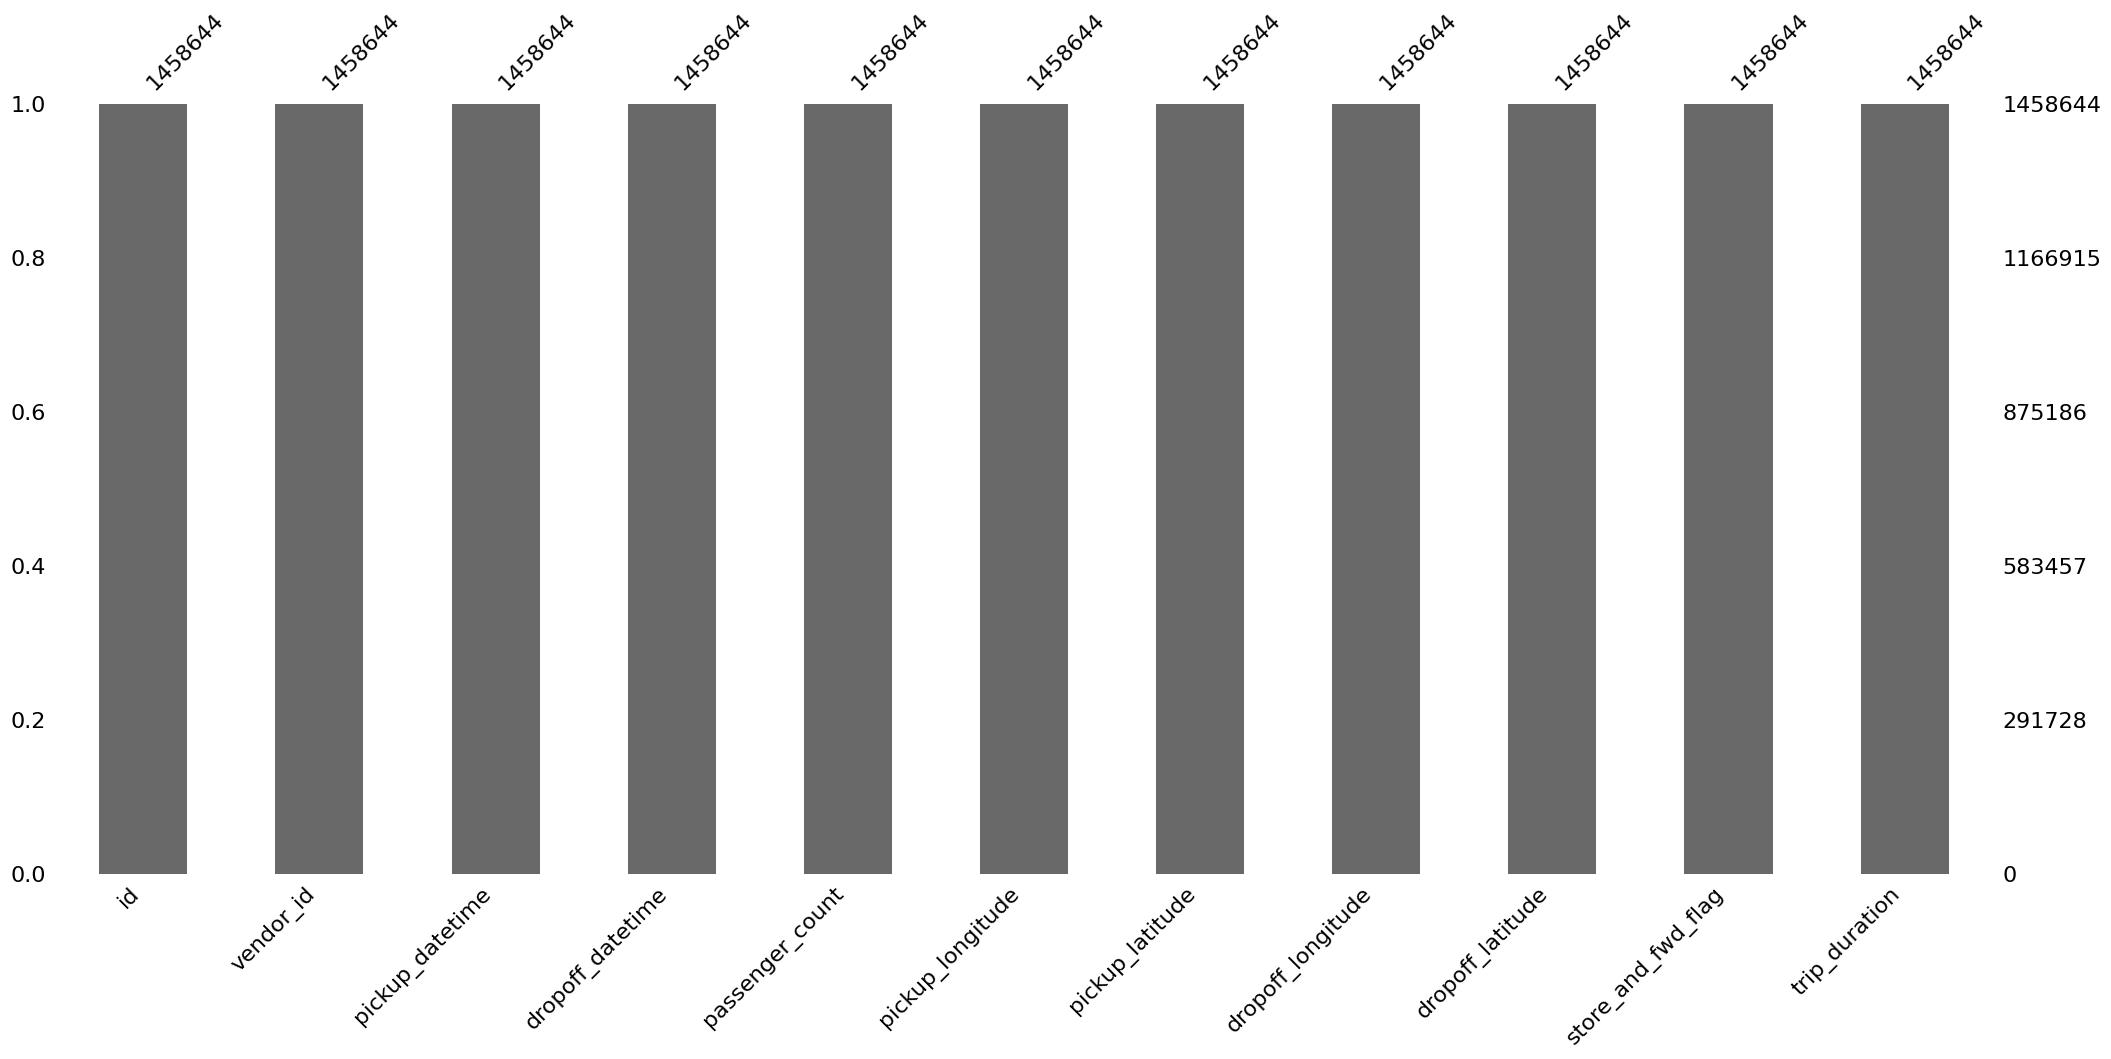

In [ ]:
# Visualizing the missing values
msno.bar(taxi_df)

### What did you know about your dataset?

I observe that in the given dataset there are no missing/null values and no duplicate values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
taxi_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
# Dataset Describe
taxi_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


### Variables Description

Id: A unique identifier for each trip

Vendor Id: A unique identifier for vendor

Pickup Datetime: Date and time of pickup

Dropoff Datetime: Date and time of dropoff

Passenger Count: The number of passengers in the vehicle (driver entered value)

Pickup Longitude: The longitude where the meter was engaged

Pickup Latitude: The latitude where the meter was engaged

Dropoff Longitude: The longitude where the meter was disengaged

Dropoff Latitude: The latitude where the meter was disengaged

Store and Fwd Flag: This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.

Trip Duration: Duration of time in seconds

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
taxi_df['vendor_id'].unique()

array([2, 1])

In [ ]:
taxi_df['pickup_datetime'].unique()

array(['2016-03-14 17:24:55', '2016-06-12 00:43:35',
       '2016-01-19 11:35:24', ..., '2016-01-10 07:35:15',
       '2016-04-22 06:57:41', '2016-01-05 15:56:26'], dtype=object)

In [ ]:
taxi_df['dropoff_datetime'].unique()

array(['2016-03-14 17:32:30', '2016-06-12 00:54:38',
       '2016-01-19 12:10:48', ..., '2016-04-22 07:10:25',
       '2016-01-05 16:02:39', '2016-04-05 14:47:43'], dtype=object)

In [ ]:
taxi_df['passenger_count'].unique()

array([1, 6, 4, 2, 3, 5, 0, 7, 9, 8])

In [ ]:
taxi_df['pickup_longitude'].unique()

array([-73.98215485, -73.98041534, -73.97902679, ..., -73.84746552,
       -73.89477539, -73.84131622])

In [ ]:
taxi_df['pickup_latitude'].unique()

array([40.76793671, 40.73856354, 40.7639389 , ..., 40.69665146,
       40.83586502, 40.82304382])

In [ ]:
taxi_df['dropoff_longitude'].unique()

array([-73.96463013, -73.9994812 , -74.00533295, ..., -73.85946655,
       -74.04266357, -73.76462555])

In [ ]:
taxi_df['dropoff_latitude'].unique()

array([40.76560211, 40.73115158, 40.71008682, ..., 40.65151978,
       40.64244461, 40.62860489])

In [ ]:
taxi_df['id'].unique()

array(['id2875421', 'id2377394', 'id3858529', ..., 'id2304944',
       'id2714485', 'id1209952'], dtype=object)

In [ ]:
taxi_df['store_and_fwd_flag'].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
taxi_df['trip_duration'].unique()

array([  455,   663,  2124, ..., 11513, 72504,  6124])

## 3. ***Data Wrangling***

### Data Wrangling Code

In [6]:
# Write your code to make your dataset analysis ready.
# Converting timestamp to datetime format
taxi_df['pickup_datetime']=pd.to_datetime(taxi_df['pickup_datetime'])
taxi_df['dropoff_datetime']=pd.to_datetime(taxi_df['dropoff_datetime'])
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [7]:
# Creating pickup and dropoff months
taxi_df['pickup_month'] = taxi_df['pickup_datetime'].dt.month
taxi_df['dropoff_month'] = taxi_df['dropoff_datetime'].dt.month

In [8]:
# Creating pickup and dropoff weekdays
taxi_df['pickup_weekday'] = taxi_df['pickup_datetime'].dt.weekday
taxi_df['dropoff_weekday'] = taxi_df['dropoff_datetime'].dt.weekday

In [9]:
# Creating pickup and dropoff hours
taxi_df['pickup_hour'] = taxi_df['pickup_datetime'].dt.hour
taxi_df['dropoff_hour'] = taxi_df['dropoff_datetime'].dt.hour

In [10]:
# Creating pickup and dropoff minutes
taxi_df['pickup_minute'] = taxi_df['pickup_datetime'].dt.minute
taxi_df['dropoff_minute'] = taxi_df['dropoff_datetime'].dt.minute

In [11]:
# Creating pickup and dropoff day
taxi_df['pickup_day'] = taxi_df['pickup_datetime'].dt.day
taxi_df['dropoff_day'] = taxi_df['dropoff_datetime'].dt.day

### What all manipulations have you done and insights you found?

We lack information about taxi journeys broken down by month,  information broken down by week and day of week,  information that would allow us to determine the peak times of day when cab services are most in demand. The distance between the locations of the taxi journeys' pickup and drop-off are likewise unavailable.

Since in the given dataset pickup_datetime and dropoff_datetime were not in proper date time format, I have converted  them into datetime format.

## **Feature Engineering**

In [12]:
#creating new columns
#creating function to calculate distance
from geopy.distance import geodesic
def distance_cal(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
  start_coordinates=(pickup_lat,pickup_long)
  stop_coordinates=(dropoff_lat,dropoff_long)
  return geodesic(start_coordinates,stop_coordinates).km

In [16]:
# Applying the function to our dataset and creating the feature ‘distance’.
taxi_df['distance'] = taxi_df.apply(lambda x: distance_cal(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

In [14]:
taxi_df['trip_duration_hour']=taxi_df['trip_duration']/3600

In [17]:
# Creating speed column (km/hr)
taxi_df['Speed']= (taxi_df.distance/(taxi_df.trip_duration/3600))

## **4. Feature Engineering**

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***5. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

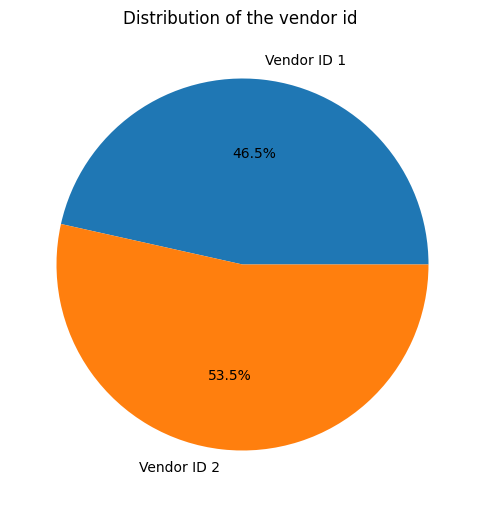

In [21]:
# Chart - 1 visualization code
(taxi_df['vendor_id'].value_counts() / taxi_df['vendor_id'].count()) * 100
v1_pctg = abs(len(taxi_df[taxi_df['vendor_id'] == 1])/len(taxi_df)*100)
v2_pctg = abs(len(taxi_df[taxi_df['vendor_id'] == 2])/len(taxi_df)*100)
total_pctg = [v1_pctg, v2_pctg]
plt.figure(figsize = (6,8))
plt.pie(total_pctg, labels = ['Vendor ID 1','Vendor ID 2'], autopct = '%.1f%%')
plt.title('Distribution of the vendor id ')
plt.show()

##### 1. Why did you pick the specific chart?

 Pie charts show the size of items (called wedge) in one data series, proportional to the sum of the items. The data points in a pie chart are shown as a percentage of the whole pie.
 This visualization chart helped me clearly understand which vendor is having higher number of bookins

##### 2. What is/are the insight(s) found from the chart?

I observe that Vendor 2 has higher number of bookings

#### Chart - 2

In [23]:
taxi_df['store_and_fwd_flag']

0          N
1          N
2          N
3          N
4          N
          ..
1458639    N
1458640    N
1458641    N
1458642    N
1458643    N
Name: store_and_fwd_flag, Length: 1458644, dtype: object

In [31]:
# Chart - 2 visualization code
taxi_df['store_and_fwd_flag'].value_counts()
plt.figure(figsize = (8, 4))
sns.countplot(taxi_df['store_and_fwd_flag'])
plt.title('Booking Count Plot')
plt.xlabel('Store_and_ fwd_flag Count')
plt.ylabel('Count for bookings')
plt.show()

TypeError: ignored

<Figure size 800x400 with 0 Axes>

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

<Axes: >

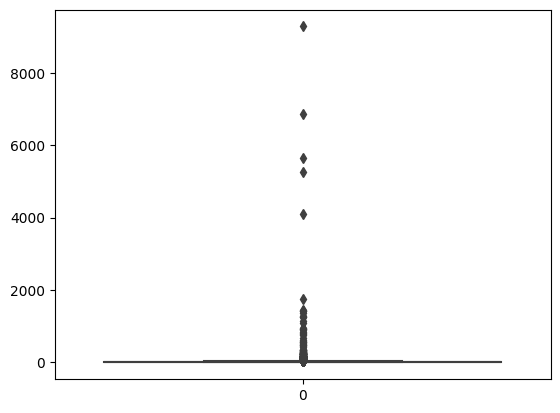

In [32]:
# Chart - 3 visualization code
# Speed outliers check
sns.boxplot(taxi_df['Speed'])

I see that some speed is in thousands, this clearly depicts that there is some error or bug in the apps calculation
hence I will limit the speed 80 kmph  and 5 kmph, as entries out side of this limit will not contribute in ML model much rather make it less accurate

In [33]:
# limiting speed data
taxi_df = taxi_df[taxi_df['Speed']<=80]
taxi_df = taxi_df[taxi_df['Speed']>=5]

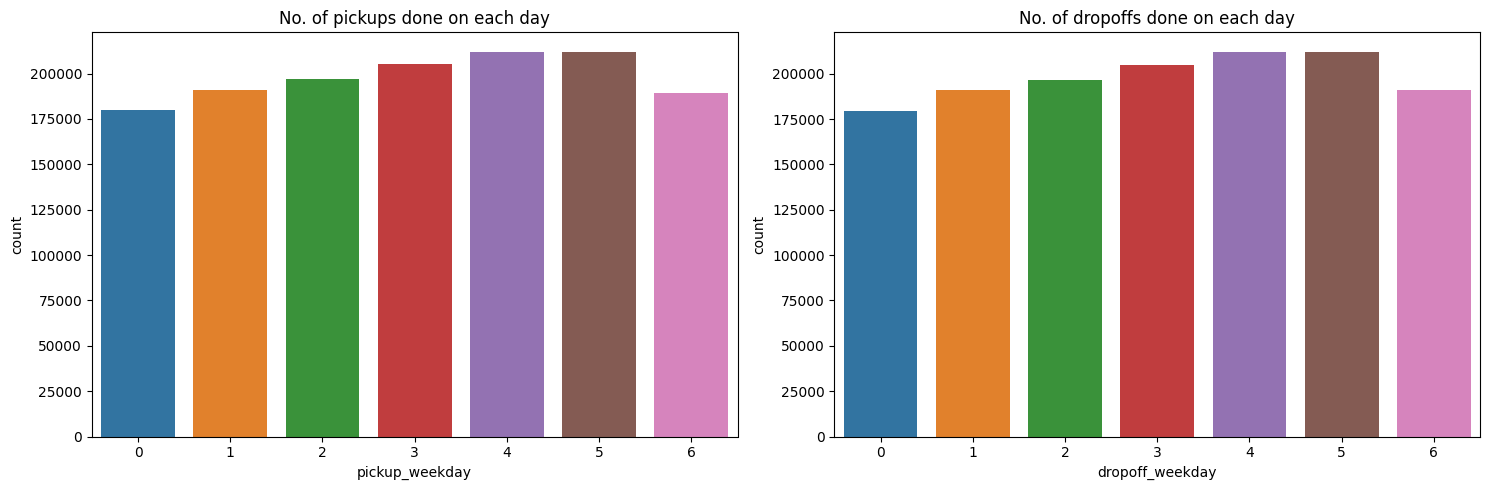

In [34]:
# Distribution of pickups and dropoffs on daily basis
figure, ax= plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.countplot(x='pickup_weekday', data = taxi_df, ax=ax[0])
ax[0].set_title('No. of pickups done on each day')

sns.countplot(x='dropoff_weekday', data = taxi_df, ax=ax[1])
ax[1].set_title('No. of dropoffs done on each day')

plt.tight_layout()

##### What is/are the insight(s) found from the chart?

I observe that there are high number of pick up and drop offs on 4(friday),5(saturday)

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***6. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***